|000>: (0.07001400420140048+0j)
|001>: (0.14002800840280097+0j)
|010>: (0.21004201260420147+0j)
|011>: (0.28005601680560194+0j)
|100>: (0.3500700210070024+0j)
|101>: (0.42008402520840293+0j)
|110>: (0.4900980294098034+0j)
|111>: (0.5601120336112039+0j)


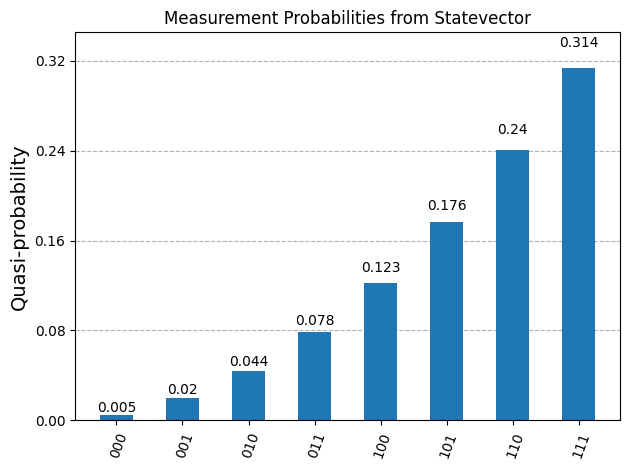

In [19]:

import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline



amplitudes = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=complex)
amplitudes = amplitudes / np.linalg.norm(amplitudes)

#statevector
psi_sv = Statevector(amplitudes)

for i, amp in enumerate(psi_sv):
    print(f"|{format(i, '03b')}>: {amp}")

#probability dictionary
probabilities = psi_sv.probabilities_dict()

#Plot histogram
plot_histogram(probabilities, title="Measurement Probabilities from Statevector")
plt.show()



Current error: 1.3638079012812616
Current number of layers: 0
|000>: (0.07001400420140058+0j)
|001>: (0.14002800840280102+0j)
|010>: (0.21004201260420152+0j)
|011>: (0.28005601680560194+0j)
|100>: (0.35007002100700263+0j)
|101>: (0.42008402520840316+0j)
|110>: (0.4900980294098035+0j)
|111>: (0.5601120336112039+0j)


/tmp/ipykernel_547644/2147259510.py:23: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):


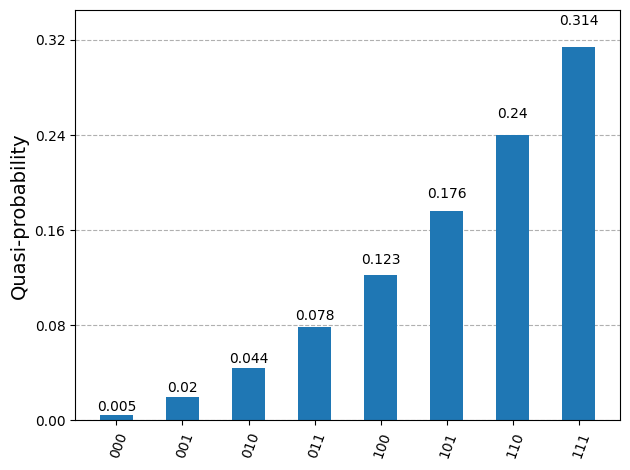

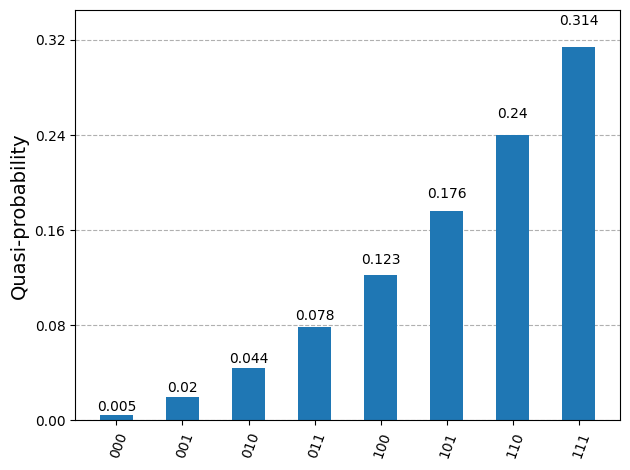

In [20]:
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


psi = [1, 2, 3, 4, 5, 6, 7, 8]
state = QuantumState.from_dense_data(data=psi, normalize=True)
number_of_mps_layers = 2
circuit = state.generate_mps_initializer_circuit(number_of_layers=number_of_mps_layers)



simulator = AerSimulator(method='automatic')
circuit.save_statevector()  # Save the full wavefunction


circuit = transpile(circuit, simulator)
result = simulator.run(circuit).result()

statevector = result.get_statevector()

for i, amp in enumerate(statevector):
    print(f"|{format(i, '03b')}>: {amp}")

probabilities = statevector.probabilities_dict()


plot_histogram(probabilities)



In [21]:
from qiskit.quantum_info import state_fidelity

fidelity = state_fidelity(psi_sv, statevector)
print(f"Fidelity: {fidelity:.6f}")


Fidelity: 1.000000


Current error: 1.3638079012812616
Current number of layers: 0
Current error: 1.3638079012812616
Current number of layers: 0
Full statevector:
 Statevector([ 0.0701795 +0.00013496j,  0.14032407+0.00107947j,
              0.21038636+0.00364203j,  0.28029418+0.00862887j,
              0.34993813+0.01684225j,  0.41915937+0.02907827j,
              0.48773748+0.04612381j,  0.55537843+0.06875248j,
              0.        +0.j        , -0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        , -0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        , -0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
             -0.        +0.j        , -0.        +0.j        ,
             -0.        +0.j        , -0.        +0.j        ,
             -0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        , 

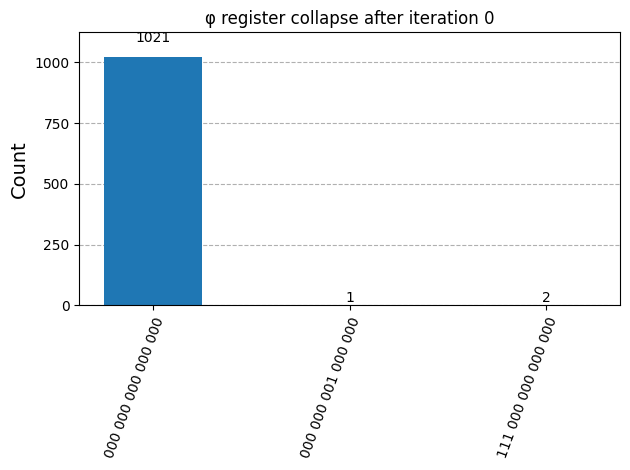

Iteration 1 ancilla outcomes: {'111 000 000 000 000': 2, '000 000 001 000 000': 1, '000 000 000 000 000': 1021}


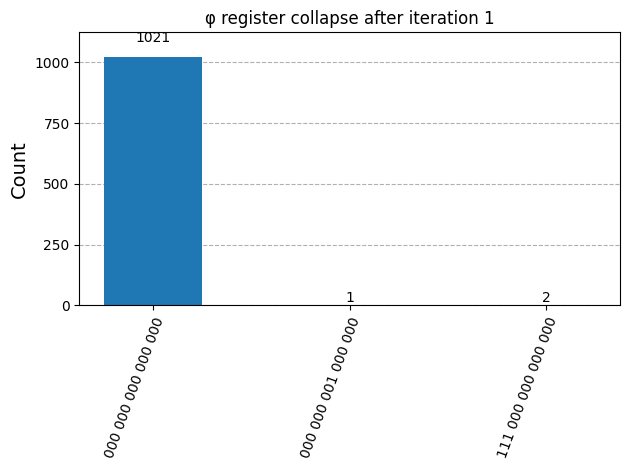

Iteration 2 ancilla outcomes: {'111 000 000 000 000': 2, '000 000 001 000 000': 1, '000 000 000 000 000': 1021}


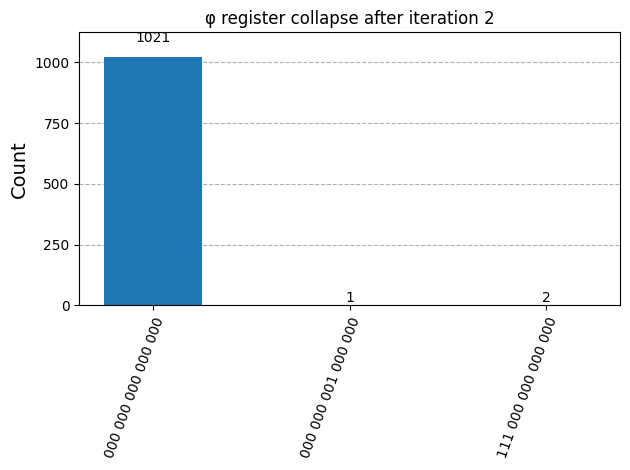

Iteration 3 ancilla outcomes: {'111 000 000 000 000': 2, '000 000 001 000 000': 1, '000 000 000 000 000': 1021}


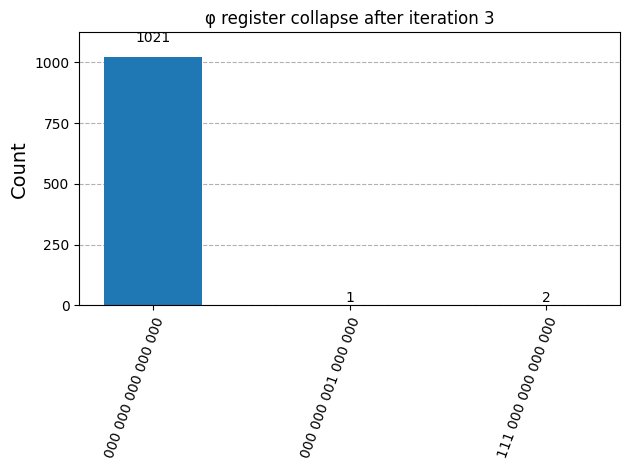

Iteration 4 ancilla outcomes: {'111 000 000 000 000': 2, '000 000 001 000 000': 1, '000 000 000 000 000': 1021}


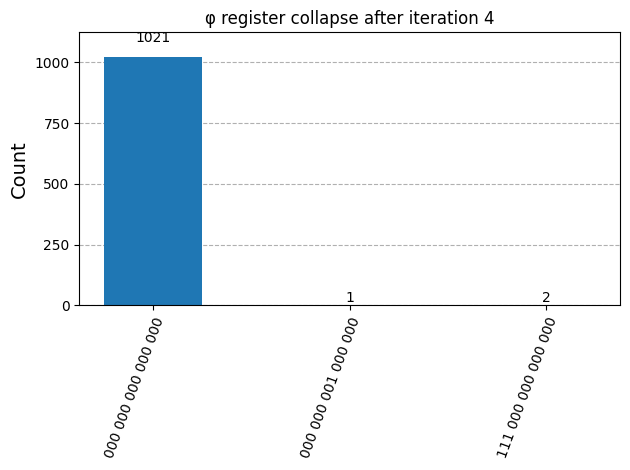

In [22]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import partial_trace, DensityMatrix, state_fidelity


psi = [1, 2, 3, 4, 5, 6, 7, 8]
phi = [1, 2, 3, 4, 5, 6, 7, 8]
n = 3  
m = 5
delta = np.pi / 40  # Phase to be added
number_of_layers = 2

psi_state = QuantumState.from_dense_data(data=psi, normalize=True)
phi_state = QuantumState.from_dense_data(data=phi, normalize=True)

U_psi = psi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
U_phi = phi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)

U_phi_dagger = U_phi.inverse()

psi_reg = QuantumRegister(n, name="ψ")
phi_reg = QuantumRegister(n, name="φ")
cregs = [ClassicalRegister(n, name=f"c{k}") for k in range(m)]
qc = QuantumCircuit(psi_reg, phi_reg, *cregs)

#for psi
qc.append(U_psi, psi_reg)

#for phi
qc.append(U_phi, phi_reg)

# bit matching
for k in range(0, m):
    for i in range(n):
        qc.cx(phi_reg[n-1-i], psi_reg[n-1-i], ctrl_state=0)

# add phase
    qc.mcp(delta, psi_reg[0:-1], psi_reg[-1])

# reset the circuit
    for i in range(n):
        qc.cx(phi_reg[i], psi_reg[i], ctrl_state=0)

    qc.append(U_phi_dagger, phi_reg)
    qc.measure(phi_reg, cregs[k])
    qc.reset(phi_reg)
    if k < m-1:
        
        qc.append(U_phi, phi_reg)

qc.save_statevector()

#simulate
# simulate
sim = AerSimulator()

# transpile AND decompose subcircuits so Aer understands them
qc_t = transpile(qc.decompose(reps=10), sim, optimization_level=0)

result = sim.run(qc_t).result()

# Full statevector
full = result.get_statevector(qc_t)

rho_psi = partial_trace(full, list(range(n, 2*n)))

print("Full statevector:\n", full)

for k in range(m):
    counts = result.get_counts(qc_t)
    print(f"Iteration {k} ancilla outcomes:", counts)
    plot_histogram(counts, title=f"φ register collapse after iteration {k}")
    plt.show()




# Measurement Z









In [23]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit.quantum_info import partial_trace, DensityMatrix, state_fidelity
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

psi_vec = np.array(psi, dtype=complex) / np.linalg.norm(psi)
phi_vec = np.array(phi, dtype=complex) / np.linalg.norm(phi)
phase_profile = np.exp(1j * delta * np.abs(phi_vec)**2)
ideal_vec = psi_vec * phase_profile
ideal_rho = DensityMatrix(ideal_vec)  # density matrix of ideal ψ

# ------------------------
# Fidelity and error
# ------------------------
fidelity = state_fidelity(rho_psi, ideal_rho)
error = 1 - fidelity

print("Fidelity:", fidelity)
print("Error:", error)


Fidelity: 0.9991882694177936
Error: 0.0008117305822064047


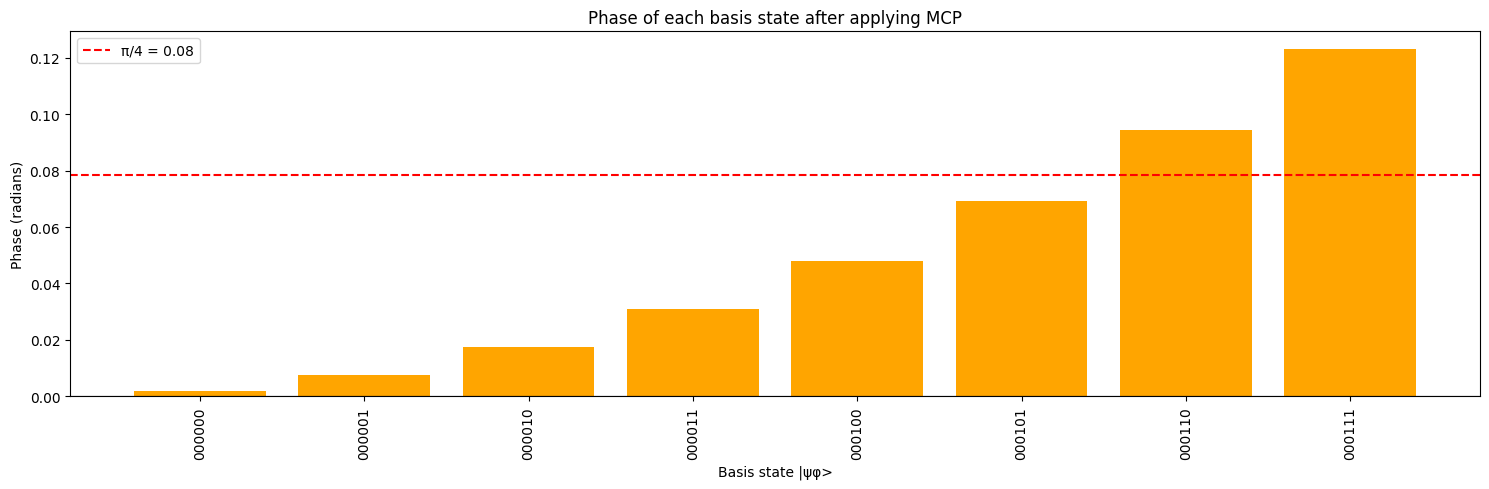

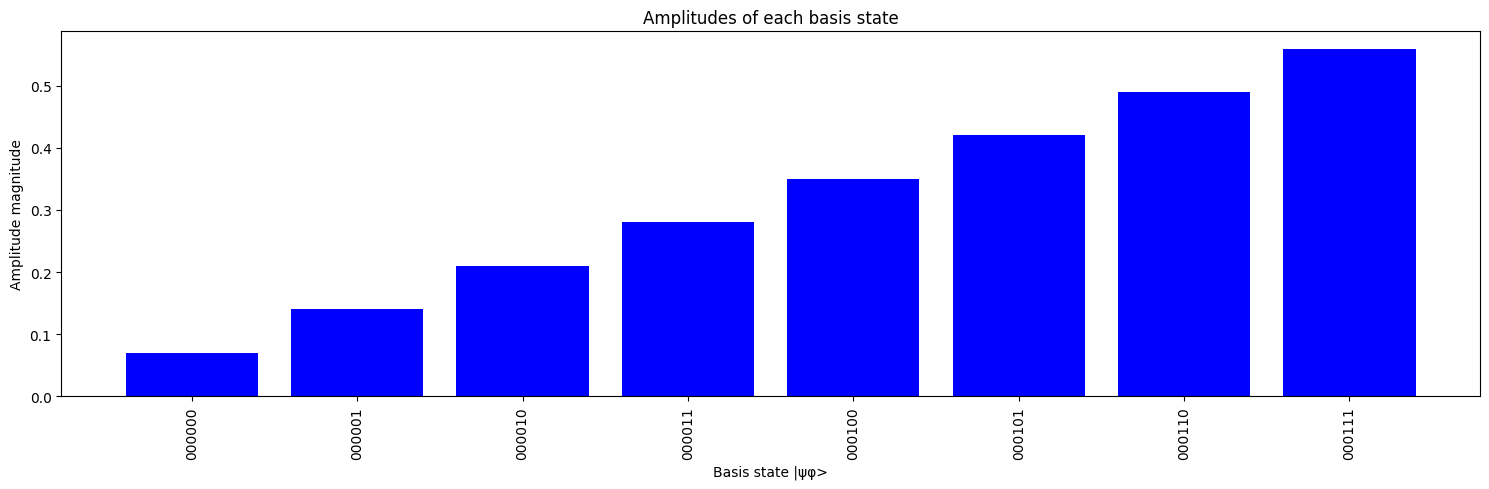

In [24]:
# Get amplitudes and phases
amps = np.abs(full)
phases = np.angle(full)

# Create basis labels
basis_labels = [format(i, f'0{n*2}b') for i in range(len(amps))]

# Plot phases vs basis states
plt.figure(figsize=(15,5))
plt.bar(basis_labels[0:8], phases[0:8], color='orange')
plt.axhline(delta, color='red', linestyle='--', label=f'π/4 = {delta:.2f}')
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Phase (radians)")
plt.xlabel("Basis state |ψφ>")
plt.xticks(rotation=90)
plt.title("Phase of each basis state after applying MCP")

plt.legend()
plt.tight_layout()
plt.show()

# Plot amplitudes separately (optional)
plt.figure(figsize=(15,5))
plt.bar(basis_labels[0:8], amps[0:8], color='blue')
plt.ylabel("Amplitude magnitude")
plt.xlabel("Basis state |ψφ>")
plt.title("Amplitudes of each basis state")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
